In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

## Data Preprocessing

In [57]:
df = pd.read_csv("Amrita-University-English-pageview.csv")
print(df.columns)
print(df.head())

Index(['Date', 'Amrita Vishwa Vidyapeetham'], dtype='object')
         Date  Amrita Vishwa Vidyapeetham
0  2015-07-01                         165
1  2015-07-02                         203
2  2015-07-03                         131
3  2015-07-04                         103
4  2015-07-05                         112


In [58]:
df.dtypes

Date                          object
Amrita Vishwa Vidyapeetham     int64
dtype: object

In [59]:
print("Dtype:", df['Date'].dtypes)
df['Date'] = pd.to_datetime(df['Date'])
print("Dtype now:", df['Date'].dtypes)

Dtype: object
Dtype now: datetime64[ns]


In [60]:
df.columns= ['Date', 'English']
df.index = df['Date']
df = df[['English']]

In [124]:
df2 = pd.read_csv("Amrita-University-Tamil-pageview.csv")
df2['Date'] = pd.to_datetime(df2['Date'])
df2.columns= ['Date', 'Tamil']
df2.index = df2['Date']
df2 = df2[['Tamil']]

In [125]:
df.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25',
               '2022-11-26', '2022-11-27', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01'],
              dtype='datetime64[ns]', length=2711, freq='D')

In [126]:
df.index = pd.date_range(start = '1/July/2015', end = '1/Dec/2022', freq='D')
df2.index = pd.date_range(start = '1/July/2015', end = '1/Dec/2022', freq='D')

In [127]:
df = pd.concat([df,df2], axis=1)

In [128]:
df.columns

Index(['English', 'Tamil', 'Tamil'], dtype='object')

In [129]:
df.shape

(2711, 3)

In [73]:
print(df.isna().sum())
df.fillna(0, inplace=True)

English    0
Tamil      0
dtype: int64


<AxesSubplot:>

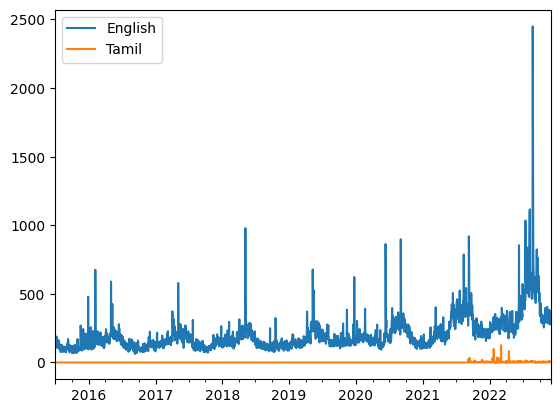

In [74]:
df.plot()

In [132]:
df3 = pd.read_csv("Amrita-University-Google-Trends.csv")
df3.columns = ['month', 'trends']
df3.index = df3['month']
df3 = df3[['trends']]

In [137]:
df3

,trends
month,
2004-01,24
2004-02,28
2004-03,24
2004-04,25
2004-05,28
...,...
2022-07,82
2022-08,100
2022-09,60


In [116]:
df3.resample()

In [114]:
df3

,Month,Trends
0,2004-01-01,24
1,2004-02-01,28
2,2004-03-01,24
3,2004-04-01,25
4,2004-05-01,28
...,...,...
222,2022-07-01,82
223,2022-08-01,100
224,2022-09-01,60
225,2022-10-01,41


## Pytrends for Google Trends Data

In [77]:
from pytrends.request import TrendReq
pytrend = TrendReq()
KEYWORDS=['Amrita Vishwa Vidyapeetham','Vellore Institute of Technology'] 
KEYWORDS_CODES=[pytrend.suggestions(keyword=i)[0] for i in KEYWORDS] 
df_CODES= pd.DataFrame(KEYWORDS_CODES)
df_CODES

,mid,title,type
0,/m/06ytyj,"Amrita Vishwa Vidyapeetham, Coimbatore campus","Private university in Coimbatore, India"
1,/m/06spsh,Vellore Institute of Technology,"Private university in Vellore, India"


In [93]:
EXACT_KEYWORDS=df_CODES['mid'].to_list()
DATE_INTERVAL='2015-01-01 2022-11-30'
COUNTRY=["IN", "AE", "BH", "US"] #ISO 3166-1 Alpha-2 ISO country code
CATEGORY=0 # https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories/
SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)


In [94]:
Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
        pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country, 
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)


In [95]:
df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
df_trends.reset_index(level=0,inplace=True) #reset_index
df_trends.columns=['date','Amrita-IN','Amrita-AE', 'Amrita-BH', 'Amrita-US','VIT-IN','VIT-AE', 'VIT-BH', 'VIT-US'] #change column names

In [96]:
df_trends

,date,Amrita-IN,Amrita-AE,Amrita-BH,Amrita-US,VIT-IN,VIT-AE,VIT-BH,VIT-US
0,2015-01-01,45,42,21,24,0,48,73,42
1,2015-02-01,44,42,71,0,25,22,60,51
2,2015-03-01,63,70,81,50,0,0,75,67
3,2015-04-01,84,100,35,34,0,0,72,100
4,2015-05-01,100,67,58,46,0,0,100,66
...,...,...,...,...,...,...,...,...,...
90,2022-07-01,62,50,60,78,0,40,31,31
91,2022-08-01,72,25,63,34,0,0,41,28
92,2022-09-01,42,20,37,25,0,0,41,27
93,2022-10-01,31,13,34,26,15,0,42,27


## Exploring Time Series Data

In [97]:
df2 = dfk.copy() 
print(df2.head(5))
print(df2.tail(5))

state      Andaman and Nicobar Islands                  Andhra Pradesh         \
values                           Cured Deaths Confirmed          Cured Deaths   
2020-01-30                         0.0    0.0       0.0            0.0    0.0   
2020-01-31                         0.0    0.0       0.0            0.0    0.0   
2020-02-01                         0.0    0.0       0.0            0.0    0.0   
2020-02-02                         0.0    0.0       0.0            0.0    0.0   
2020-02-03                         0.0    0.0       0.0            0.0    0.0   

state                Arunachal Pradesh                  Assam  ...  \
values     Confirmed             Cured Deaths Confirmed Cured  ...   
2020-01-30       0.0               0.0    0.0       0.0   0.0  ...   
2020-01-31       0.0               0.0    0.0       0.0   0.0  ...   
2020-02-01       0.0               0.0    0.0       0.0   0.0  ...   
2020-02-02       0.0               0.0    0.0       0.0   0.0  ...   
2020-02-03  

In [98]:
print("No of Rows:", len(df2))
print("Start Date:", df2.index.min())
print("End Date:", df2.index.max())

No of Rows: 560
Start Date: 2020-01-30 00:00:00
End Date: 2021-08-11 00:00:00


In [99]:
print(df2['01-2021'])

state      Andaman and Nicobar Islands                  Andhra Pradesh         \
values                           Cured Deaths Confirmed          Cured Deaths   
2021-01-01                         6.0    0.0       4.0          328.0    4.0   
2021-01-02                         4.0    0.0       1.0          350.0    0.0   
2021-01-03                         7.0    0.0       1.0          279.0    3.0   
2021-01-04                         9.0    0.0       1.0          352.0    4.0   
2021-01-05                         2.0    0.0       0.0          252.0    3.0   
2021-01-06                         8.0    0.0       1.0          278.0    4.0   
2021-01-07                         3.0    0.0       0.0          428.0    3.0   
2021-01-08                         5.0    0.0       9.0          368.0    1.0   
2021-01-09                         2.0    0.0       1.0          308.0    1.0   
2021-01-10                         7.0    0.0       0.0          423.0    1.0   
2021-01-11                  

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_5828\74038149.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(df2['01-2021'])


In [100]:
df2.loc[:, ('Total','Cured')]

2020-01-30        0.0
2020-01-31        0.0
2020-02-01        0.0
2020-02-02        0.0
2020-02-03        0.0
               ...   
2021-08-07    40017.0
2021-08-08    43910.0
2021-08-09    39686.0
2021-08-10    41511.0
2021-08-11    40013.0
Freq: D, Name: (Total, Cured), Length: 560, dtype: float64

## DateTime Features

In [101]:
tsd = df2['Total'].copy()
tsd['month'] = [tsd.index[i].month for i in range(len(tsd))]
tsd['day'] = [tsd.index[i].day for i in range(len(tsd))]
print("Columns:", tsd.columns)
print(tsd.head())

Columns: Index(['Cured', 'Deaths', 'Confirmed', 'month', 'day'], dtype='object', name='values')
values      Cured  Deaths  Confirmed  month  day
2020-01-30    0.0     0.0        1.0      1   30
2020-01-31    0.0     0.0        0.0      1   31
2020-02-01    0.0     0.0        1.0      2    1
2020-02-02    0.0     0.0        1.0      2    2
2020-02-03    0.0     0.0        0.0      2    3


In [102]:
tsd = df2['Total'].copy()
tsd = pd.concat([tsd, tsd.shift(1).rename(columns={'Cured':'CuredS1', 'Deaths':'DeathsS1', 'Confirmed':'ConfirmedS1'})], axis=1)
print(tsd.head())

values      Cured  Deaths  Confirmed  CuredS1  DeathsS1  ConfirmedS1
2020-01-30    0.0     0.0        1.0      NaN       NaN          NaN
2020-01-31    0.0     0.0        0.0      0.0       0.0          1.0
2020-02-01    0.0     0.0        1.0      0.0       0.0          0.0
2020-02-02    0.0     0.0        1.0      0.0       0.0          1.0
2020-02-03    0.0     0.0        0.0      0.0       0.0          1.0


In [103]:
tsd = df2['Total'].copy()
tsd = pd.concat([tsd, tsd.shift(1).rename(columns={'Cured':'CuredS1', 'Deaths':'DeathsS1', 'Confirmed':'ConfirmedS1'}), tsd.shift(2).rename(columns={'Cured':'CuredS2', 'Deaths':'DeathsS2', 'Confirmed':'ConfirmedS2'}), tsd.shift(3).rename(columns={'Cured':'CuredS3', 'Deaths':'DeathsS3', 'Confirmed':'ConfirmedS3'})], axis=1)
print(tsd.head())

values      Cured  Deaths  Confirmed  CuredS1  DeathsS1  ConfirmedS1  CuredS2  \
2020-01-30    0.0     0.0        1.0      NaN       NaN          NaN      NaN   
2020-01-31    0.0     0.0        0.0      0.0       0.0          1.0      NaN   
2020-02-01    0.0     0.0        1.0      0.0       0.0          0.0      0.0   
2020-02-02    0.0     0.0        1.0      0.0       0.0          1.0      0.0   
2020-02-03    0.0     0.0        0.0      0.0       0.0          1.0      0.0   

values      DeathsS2  ConfirmedS2  CuredS3  DeathsS3  ConfirmedS3  
2020-01-30       NaN          NaN      NaN       NaN          NaN  
2020-01-31       NaN          NaN      NaN       NaN          NaN  
2020-02-01       0.0          1.0      NaN       NaN          NaN  
2020-02-02       0.0          0.0      0.0       0.0          1.0  
2020-02-03       0.0          1.0      0.0       0.0          0.0  


In [104]:
tsd = df2['Total'].copy()
tsdsh = tsd.shift(1).rename(columns={'Cured':'CuredS1', 'Deaths':'DeathsS1', 'Confirmed':'ConfirmedS1'})

window = tsdsh.rolling(window=2).mean()
dfts = pd.concat([tsd, window], axis=1)
print(dfts.head(5))

values      Cured  Deaths  Confirmed  CuredS1  DeathsS1  ConfirmedS1
2020-01-30    0.0     0.0        1.0      NaN       NaN          NaN
2020-01-31    0.0     0.0        0.0      NaN       NaN          NaN
2020-02-01    0.0     0.0        1.0      0.0       0.0          0.5
2020-02-02    0.0     0.0        1.0      0.0       0.0          0.5
2020-02-03    0.0     0.0        0.0      0.0       0.0          1.0


In [105]:
tsd = df2['Total'].copy()
tsdsh = tsd.shift(2).rename(columns={'Cured':'CuredS2', 'Deaths':'DeathsS2', 'Confirmed':'ConfirmedS2'})

dfts = pd.concat([tsd, tsdsh.rolling(window=3).mean().rename(columns={'CuredS2':'CuredS2mean', 'DeathsS2':'DeathsS2mean', 'ConfirmedS2':'ConfirmedS2mean'}), tsdsh.rolling(window=3).min().rename(columns={'CuredS2':'CuredS2min', 'DeathsS2':'DeathsS2min', 'ConfirmedS2':'ConfirmedS2min'}), tsdsh.rolling(window=3).max().rename(columns={'CuredS2':'CuredS2max', 'DeathsS2':'DeathsS2max', 'ConfirmedS2':'ConfirmedS2max'})], axis=1)
print(dfts.head(5))

values      Cured  Deaths  Confirmed  CuredS2mean  DeathsS2mean  \
2020-01-30    0.0     0.0        1.0          NaN           NaN   
2020-01-31    0.0     0.0        0.0          NaN           NaN   
2020-02-01    0.0     0.0        1.0          NaN           NaN   
2020-02-02    0.0     0.0        1.0          NaN           NaN   
2020-02-03    0.0     0.0        0.0          0.0           0.0   

values      ConfirmedS2mean  CuredS2min  DeathsS2min  ConfirmedS2min  \
2020-01-30              NaN         NaN          NaN             NaN   
2020-01-31              NaN         NaN          NaN             NaN   
2020-02-01              NaN         NaN          NaN             NaN   
2020-02-02              NaN         NaN          NaN             NaN   
2020-02-03         0.666667         0.0          0.0             0.0   

values      CuredS2max  DeathsS2max  ConfirmedS2max  
2020-01-30         NaN          NaN             NaN  
2020-01-31         NaN          NaN             NaN  
20

In [106]:
tsd = df2['Total'].copy()
tsdsh = tsd.shift(1).rename(columns={'Cured':'CuredS2', 'Deaths':'DeathsS2', 'Confirmed':'ConfirmedS2'})

dfts = pd.concat([tsd, tsdsh.expanding().mean().rename(columns={'CuredS2':'CuredS2mean', 'DeathsS2':'DeathsS2mean', 'ConfirmedS2':'ConfirmedS2mean'}), tsdsh.expanding().min().rename(columns={'CuredS2':'CuredS2min', 'DeathsS2':'DeathsS2min', 'ConfirmedS2':'ConfirmedS2min'}), tsdsh.expanding().max().rename(columns={'CuredS2':'CuredS2max', 'DeathsS2':'DeathsS2max', 'ConfirmedS2':'ConfirmedS2max'})], axis=1)
print(dfts.head(5))

values      Cured  Deaths  Confirmed  CuredS2mean  DeathsS2mean  \
2020-01-30    0.0     0.0        1.0          NaN           NaN   
2020-01-31    0.0     0.0        0.0          0.0           0.0   
2020-02-01    0.0     0.0        1.0          0.0           0.0   
2020-02-02    0.0     0.0        1.0          0.0           0.0   
2020-02-03    0.0     0.0        0.0          0.0           0.0   

values      ConfirmedS2mean  CuredS2min  DeathsS2min  ConfirmedS2min  \
2020-01-30              NaN         NaN          NaN             NaN   
2020-01-31         1.000000         0.0          0.0             1.0   
2020-02-01         0.500000         0.0          0.0             0.0   
2020-02-02         0.666667         0.0          0.0             0.0   
2020-02-03         0.750000         0.0          0.0             0.0   

values      CuredS2max  DeathsS2max  ConfirmedS2max  
2020-01-30         NaN          NaN             NaN  
2020-01-31         0.0          0.0             1.0  
20

## Visualisation

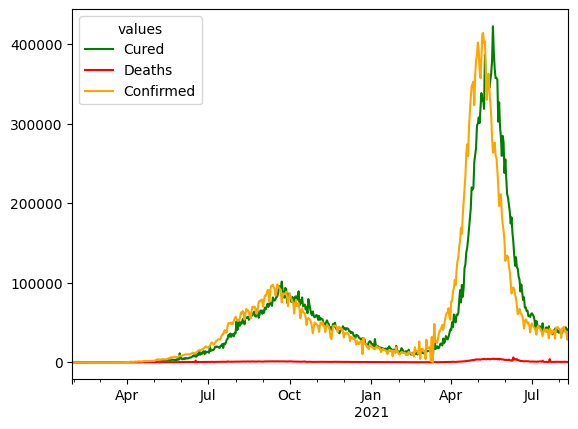

In [107]:
tsd.plot( color=['green', 'red', 'orange'])
plt.show()

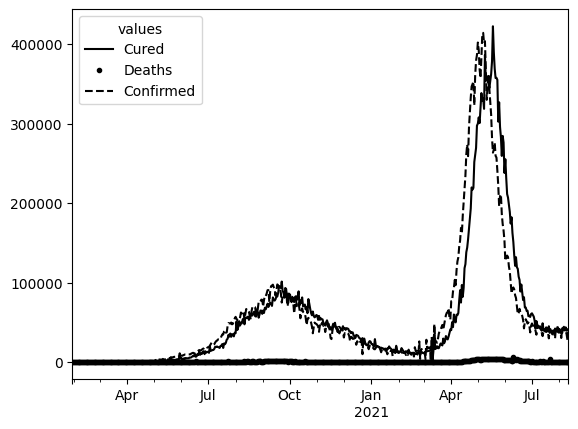

In [108]:
tsd.plot(style=['k-','k.','k--'])
plt.show()


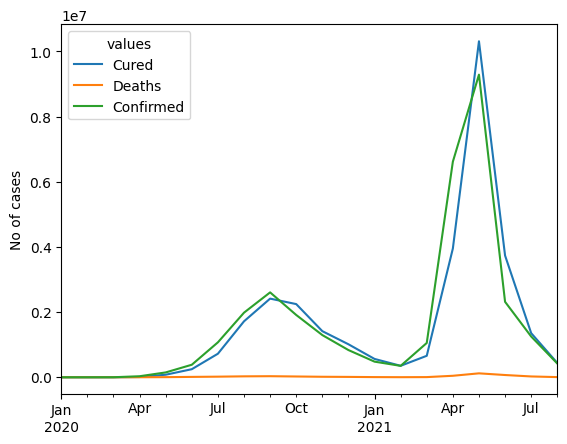

In [109]:
tsd.resample('M').sum().plot()
plt.ylabel("No of cases")
plt.show()


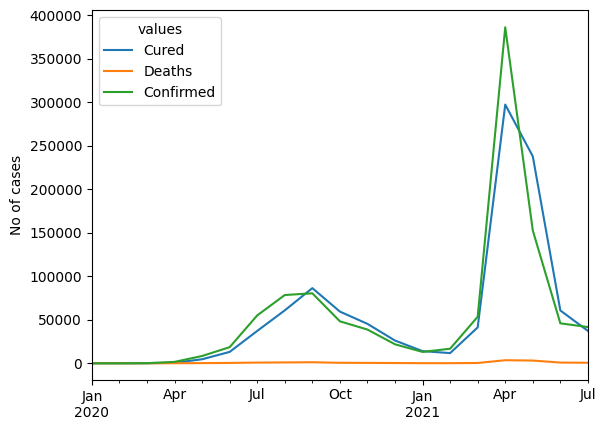

In [110]:
tsd.asfreq('M').plot()
plt.ylabel("No of cases")
plt.show()


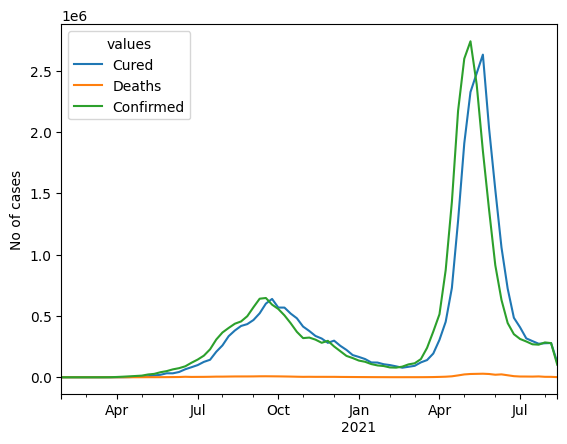

In [111]:
tsd.resample('W').sum().plot()
plt.ylabel("No of cases")
plt.show()


In [112]:
tsd

values,Cured,Deaths,Confirmed
2020-01-30,0.0,0.0,1.0
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,1.0
2020-02-02,0.0,0.0,1.0
2020-02-03,0.0,0.0,0.0
...,...,...,...
2021-08-07,40017.0,617.0,38628.0
2021-08-08,43910.0,491.0,39070.0
2021-08-09,39686.0,447.0,35499.0
2021-08-10,41511.0,373.0,28204.0


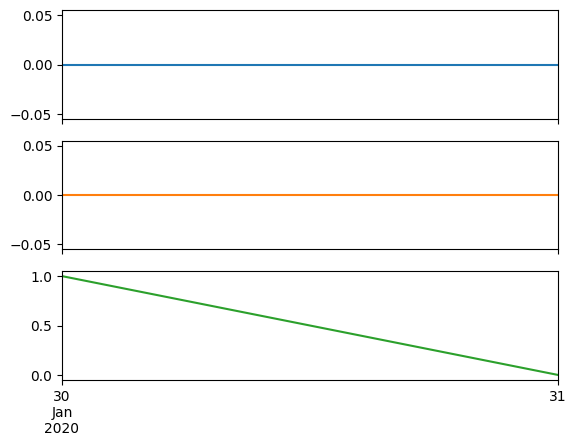

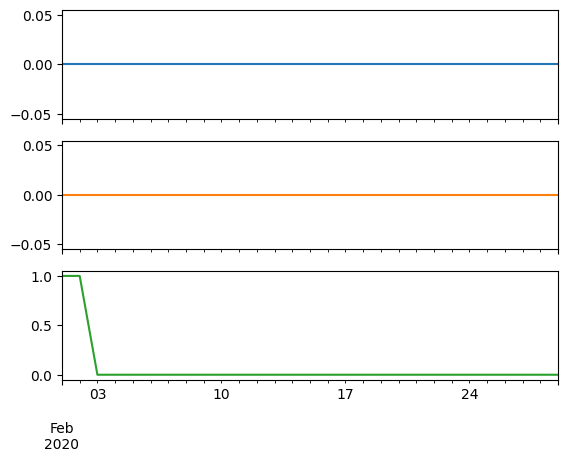

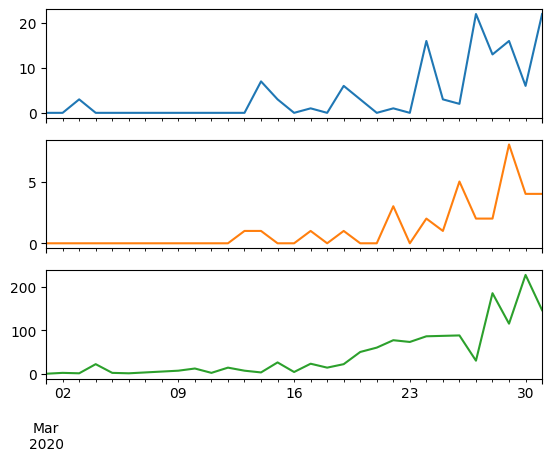

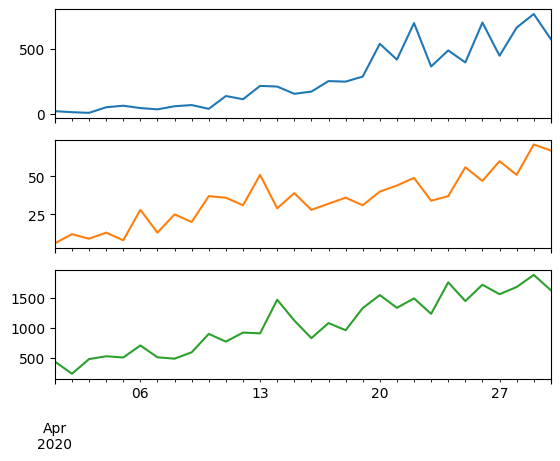

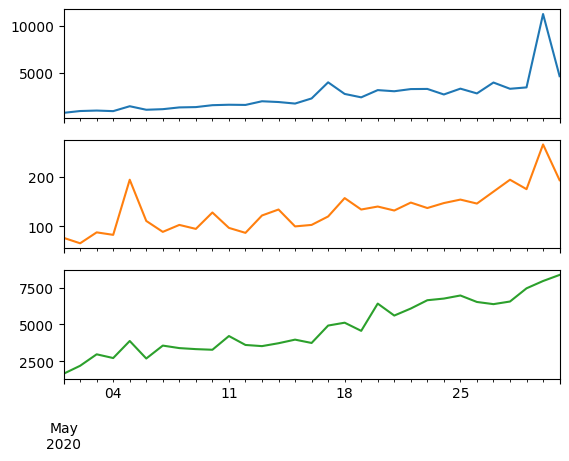

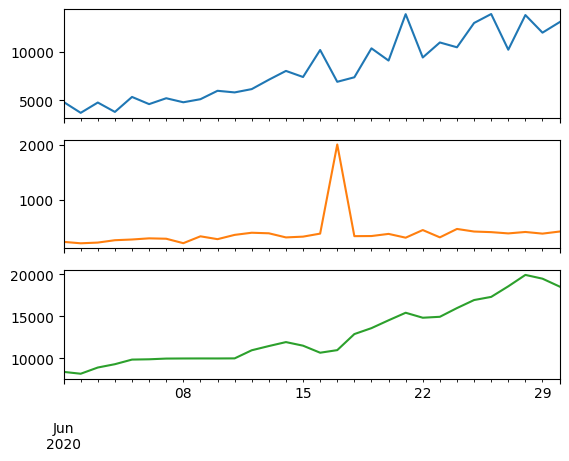

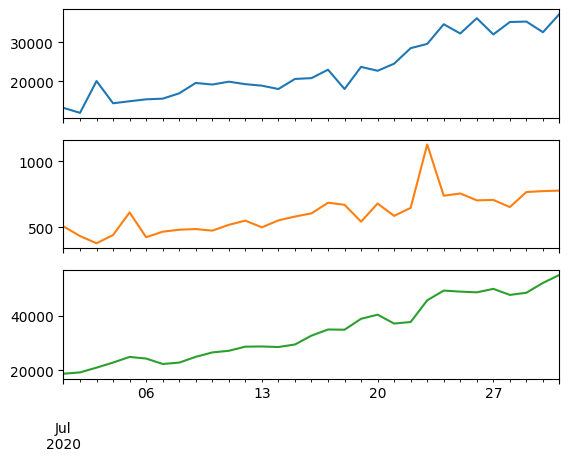

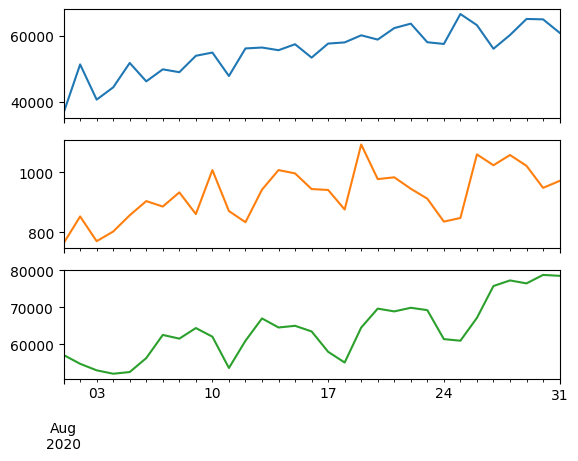

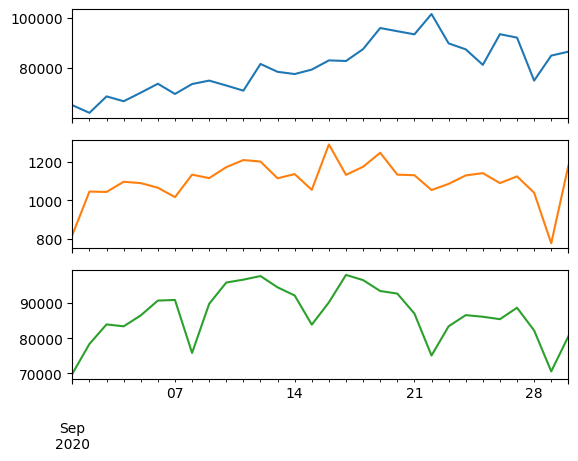

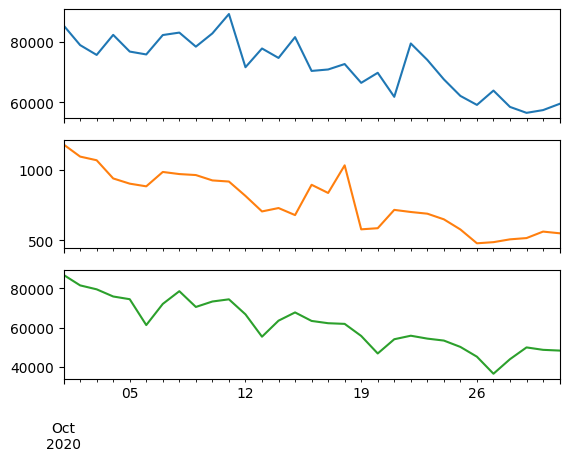

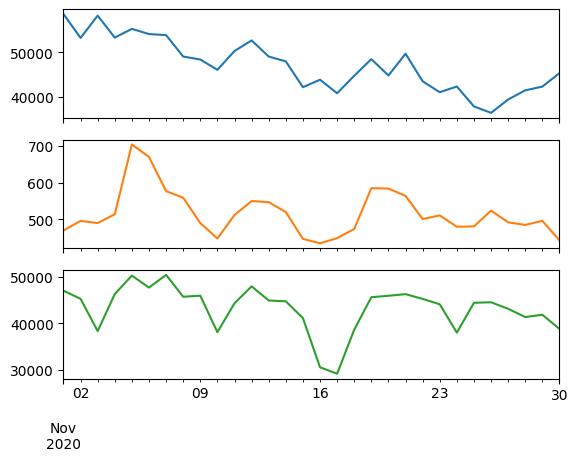

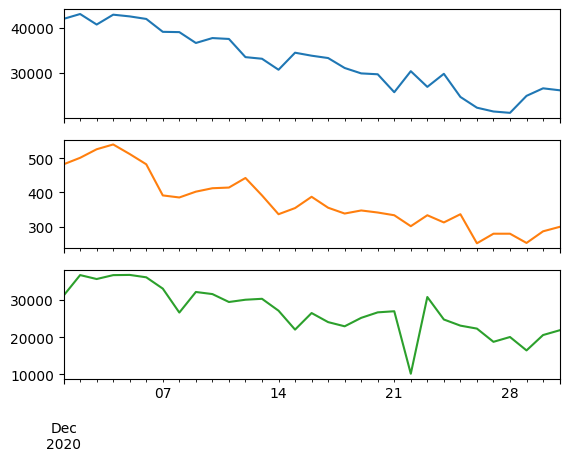

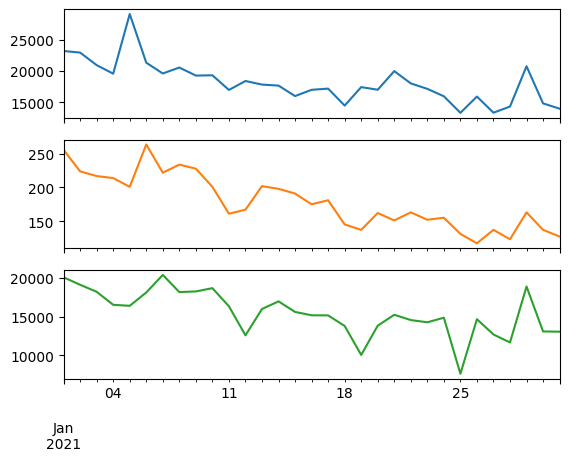

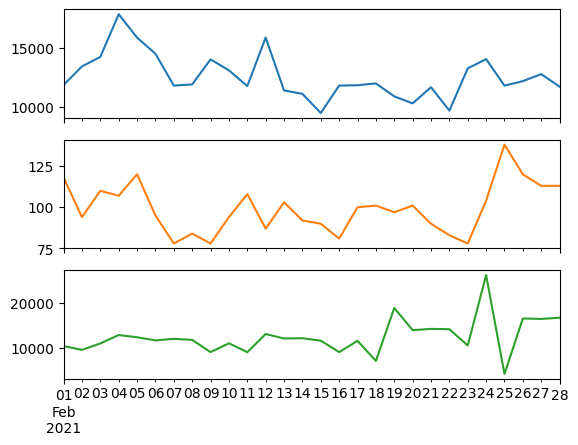

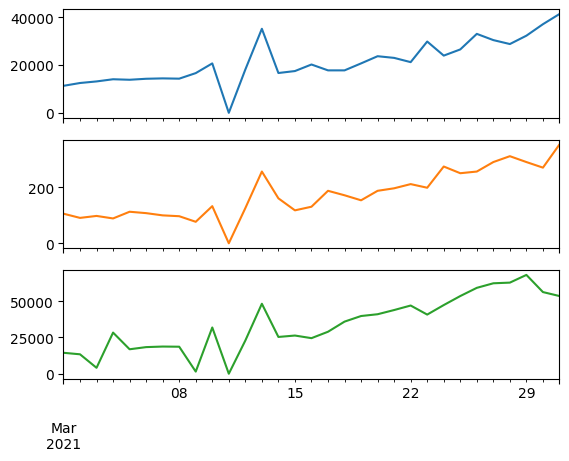

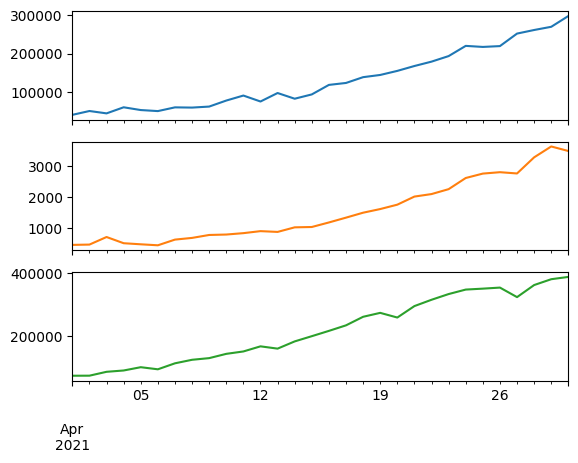

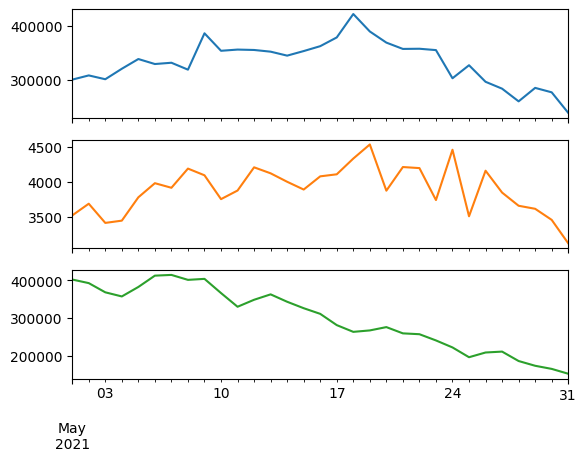

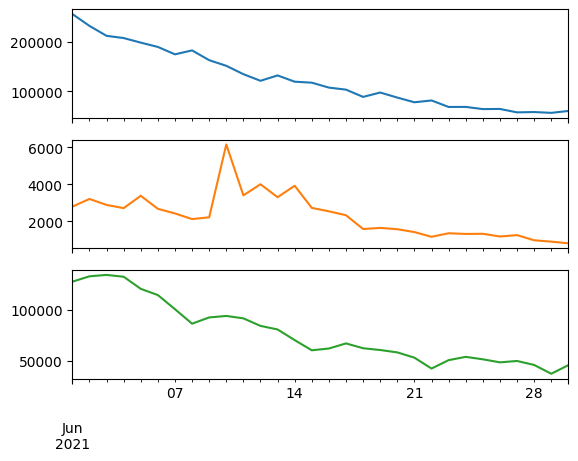

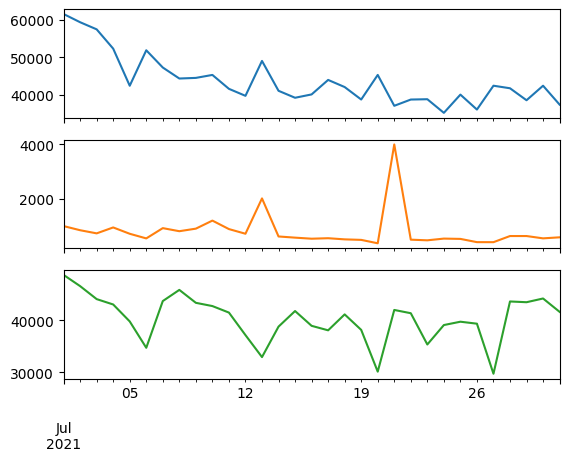

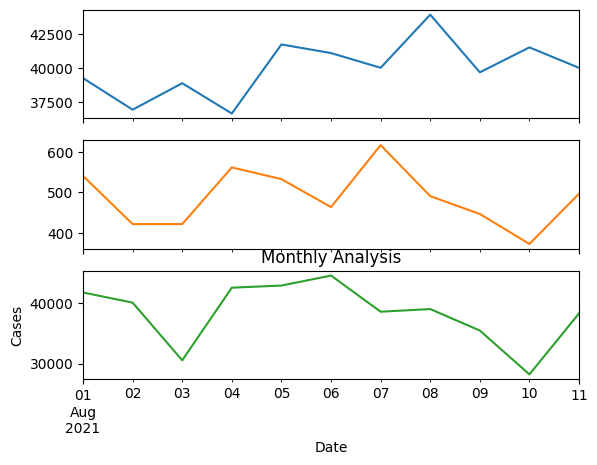

In [113]:

groups = tsd.groupby(by=[tsd.index.year, tsd.index.month], sort = True)
groups.plot(subplots=True, legend=False)
plt.title("Monthly Analysis")
plt.ylabel("Cases")
plt.xlabel("Date")
plt.show()
   

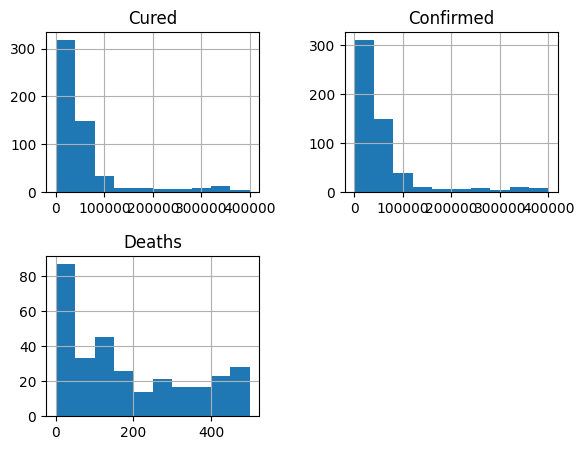

In [114]:
plt.subplot(2,2,1)
tsd['Cured'].hist(range=[0,400000])
plt.title("Cured")
plt.subplot(2,2,2)
tsd['Confirmed'].hist(range=[0,400000])
plt.title("Confirmed")
plt.subplot(2,2,3)
tsd['Deaths'].hist(range=[0,500])
plt.title("Deaths")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

<AxesSubplot:ylabel='Density'>

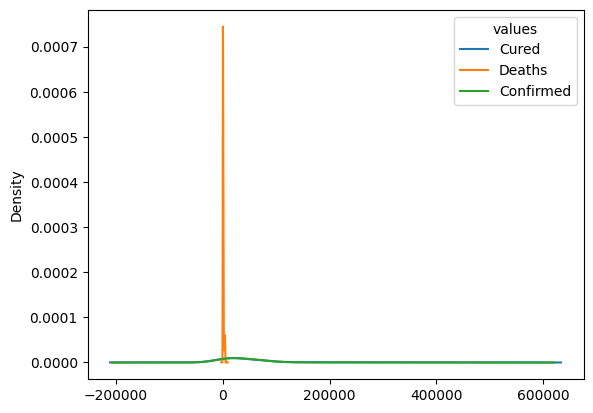

In [115]:
tsd.plot(kind='kde')


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_5828\2203559149.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  groups.boxplot(subplots=True)


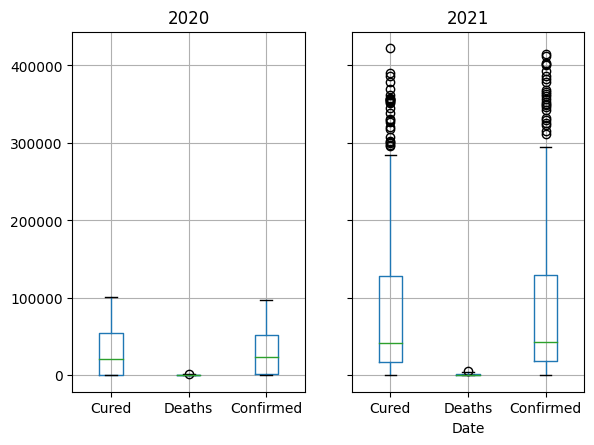

In [116]:
groups = tsd.groupby(by=[tsd.index.year], sort = True)
groups.boxplot(subplots=True)
plt.ylabel("Cases")
plt.xlabel("Date")
plt.show()

<AxesSubplot:ylabel='Confirmed'>

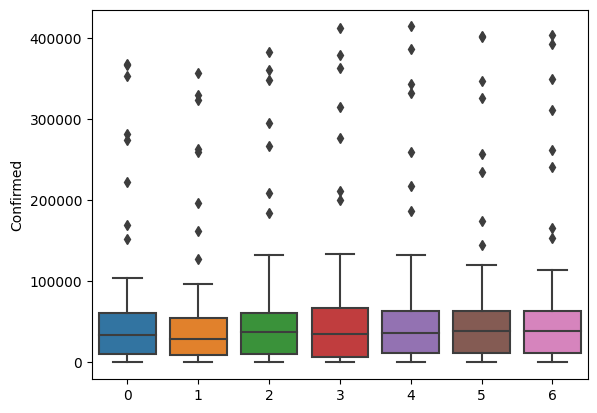

In [117]:
sns.boxplot(data = tsd, x=tsd.index.weekday,y ='Confirmed')

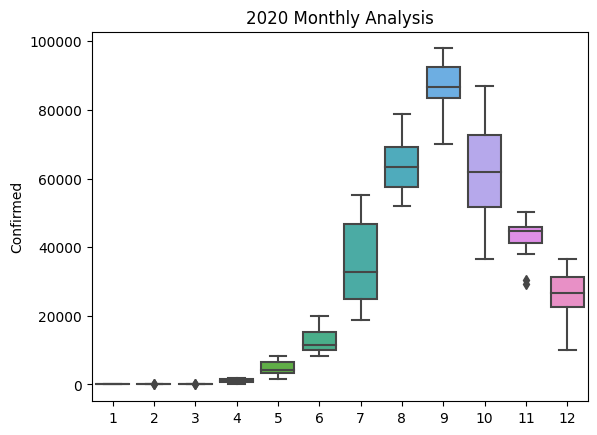

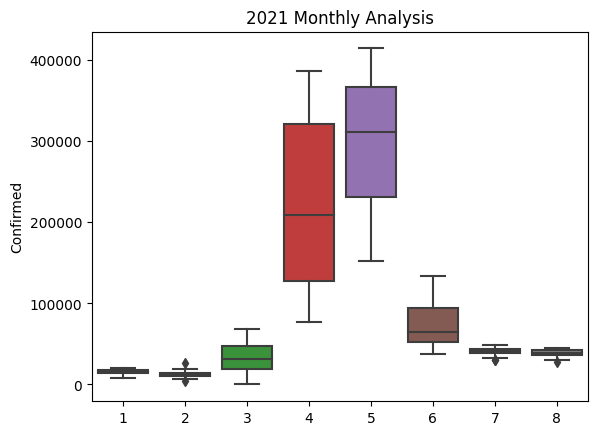

In [118]:
tsd2 = tsd[tsd.index.year == 2020]
sns.boxplot(data = tsd2, x=tsd2.index.month ,y ='Confirmed')
plt.title("2020 Monthly Analysis")
plt.show()
tsd2 = tsd[tsd.index.year == 2021]
sns.boxplot(data = tsd2, x=tsd2.index.month ,y ='Confirmed')
plt.title("2021 Monthly Analysis")
plt.show()


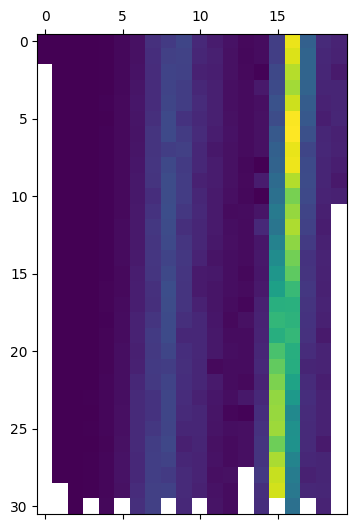

In [119]:
one_year = tsd['Confirmed']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = pd.date_range(start="1/Jan/2020", end="1/Sep/2021", freq='M')
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()
# 0-21 are months

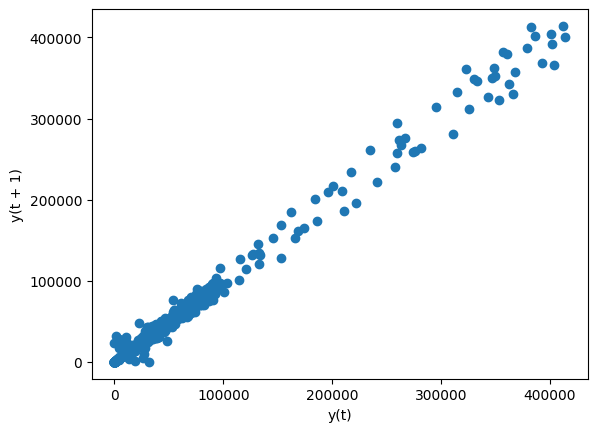

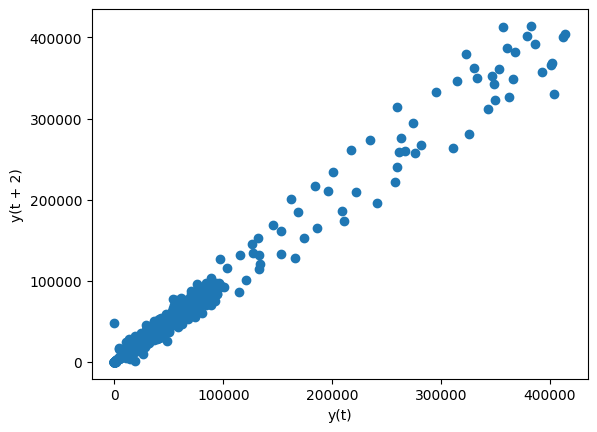

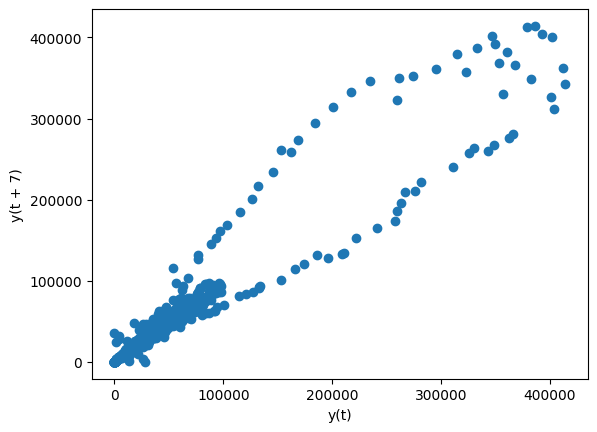

In [120]:
pd.plotting.lag_plot(tsd['Confirmed'], lag=1)
plt.show("Lag Plot t vs t+1")
plt.show()
pd.plotting.lag_plot(tsd['Confirmed'], lag=2)
plt.show("Lag Plot t vs t+2")
plt.show()
pd.plotting.lag_plot(tsd['Confirmed'], lag=7)
plt.show("Lag Plot t vs t+7")
plt.show()
# High Positive Correlation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

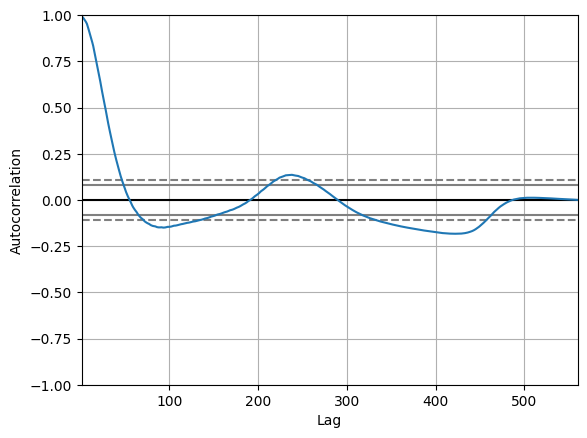

In [121]:
pd.plotting.autocorrelation_plot(tsd['Confirmed'])
# 230 - 2nd wave
# highest when lag = 1

## Resampling and Interpolation

In [122]:
tsd.resample('H').mean()

values,Cured,Deaths,Confirmed
2020-01-30 00:00:00,0.0,0.0,1.0
2020-01-30 01:00:00,NaN,NaN,NaN
2020-01-30 02:00:00,NaN,NaN,NaN
2020-01-30 03:00:00,NaN,NaN,NaN
2020-01-30 04:00:00,NaN,NaN,NaN
...,...,...,...
2021-08-10 20:00:00,NaN,NaN,NaN
2021-08-10 21:00:00,NaN,NaN,NaN
2021-08-10 22:00:00,NaN,NaN,NaN
2021-08-10 23:00:00,NaN,NaN,NaN


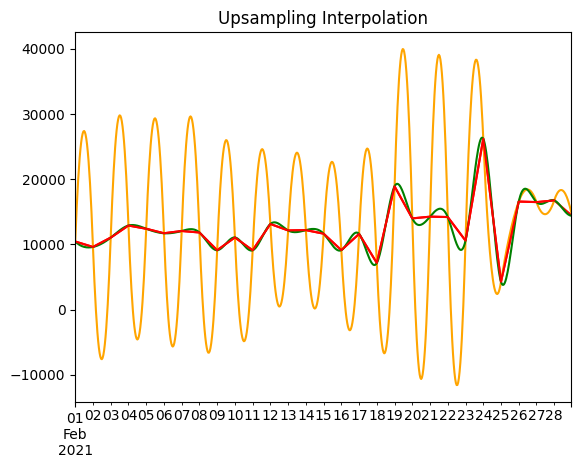

In [123]:
tsd.resample('H').mean().interpolate(method='linear')['Confirmed']['Feb-2021'].plot(color='Red', label="Linear Interpolation")
tsd.resample('H').mean().interpolate(method='spline', order=2)['Confirmed']['Feb-2021'].plot(color='Orange', label="Spline Interpolation 2")
tsd.resample('H').mean().interpolate(method='spline', order=3)['Confirmed']['Feb-2021'].plot(color='Green', label="Linear Interpolation 3")
tsd['Confirmed']['Feb-2021'].plot(color='Red')
plt.title("Upsampling Interpolation")
plt.show()

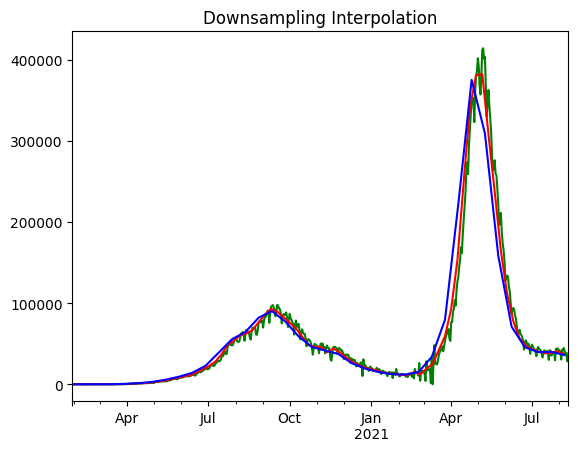

In [124]:
tsd['Confirmed'].plot(color='Green', label="Downsampling 15 days")
tsd['Confirmed'].resample('7D').mean().plot(color='Red', label="Downsampling 7 days")
tsd['Confirmed'].resample('15D').mean().plot(color='Blue', label="Downsampling 15 days")
plt.title("Downsampling Interpolation")
plt.show()

## Power Transformation

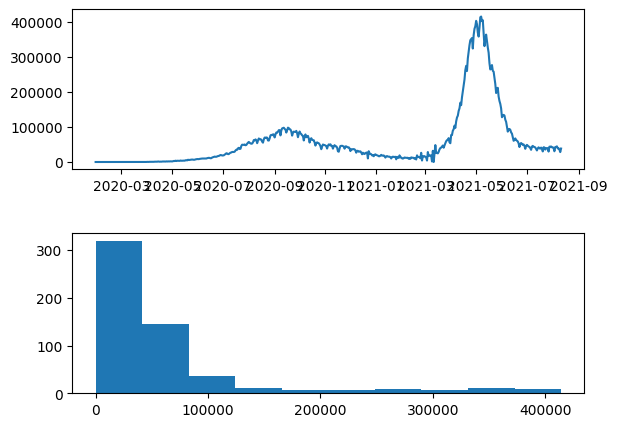

In [125]:
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(tsd['Confirmed'])
# histogram
plt.subplot(212)
plt.hist(tsd['Confirmed'])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

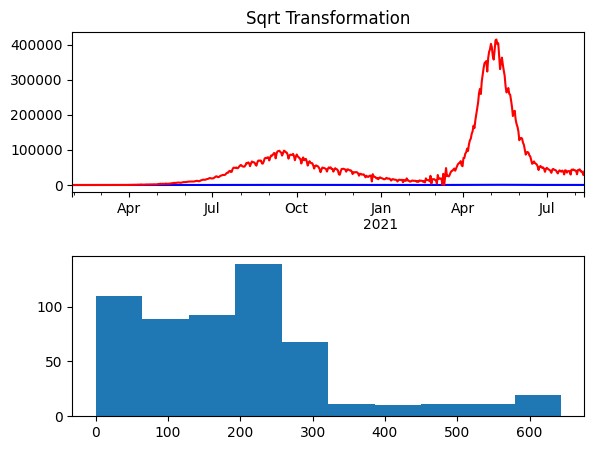

In [126]:
plt.subplot(211)
np.sqrt(tsd['Confirmed']).plot(color='Blue')
tsd['Confirmed'].plot(color='Red')
plt.title("Sqrt Transformation")
plt.subplot(212)
plt.hist(np.sqrt(tsd['Confirmed']))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

In [127]:

print('for Sqrt data Results of Dickey-Fuller Test:')
dftest = adfuller(np.sqrt(tsd['Confirmed']), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for Sqrt data Results of Dickey-Fuller Test:
Test Statistic                  -3.072473
p-value                          0.028659
#Lags Used                      18.000000
Number of Observations Used    541.000000
Critical Value (1%)             -3.442495
Critical Value (5%)             -2.866897
Critical Value (10%)            -2.569623
dtype: float64


c:\Users\dharaneish\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


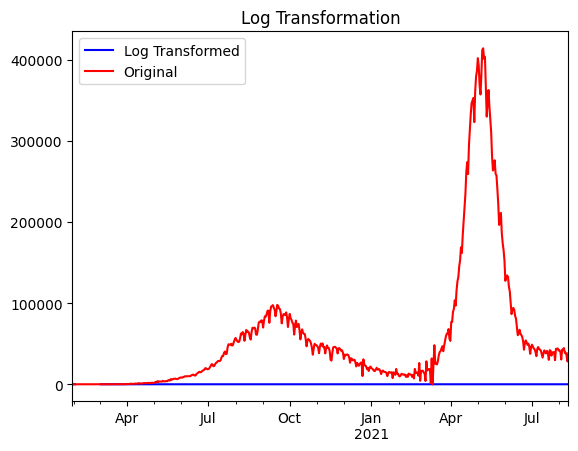

In [128]:
#plt.subplot(211)
np.log(tsd['Confirmed']).plot(color='Blue', label="Log Transformed")
tsd['Confirmed'].plot(color='Red', label="Original")
plt.title("Log Transformation")
#plt.subplot(212)
#plt.hist(np.log(tsd['Confirmed']))
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
# LOG TRANSFORM OF 0 GIVES -INF SO HISTOGRAM AIN'T POSSIBLE
# So ADF test is also not possible
plt.legend()


c:\Users\dharaneish\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


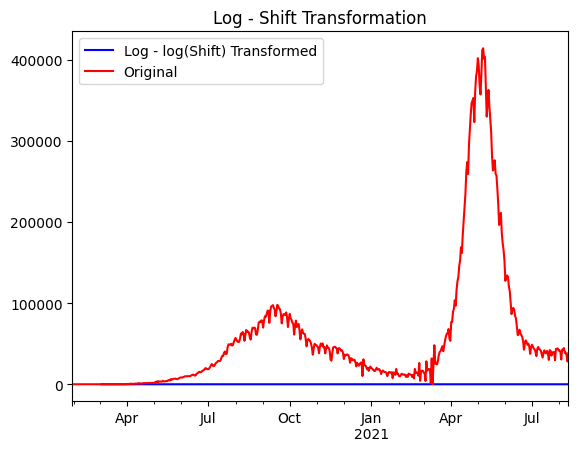

In [129]:
(np.log(tsd['Confirmed']) - np.log(tsd['Confirmed']).shift()).plot(color='Blue', label="Log - log(Shift) Transformed")
tsd['Confirmed'].plot(color='Red', label="Original")
plt.title("Log - Shift Transformation")
plt.legend()


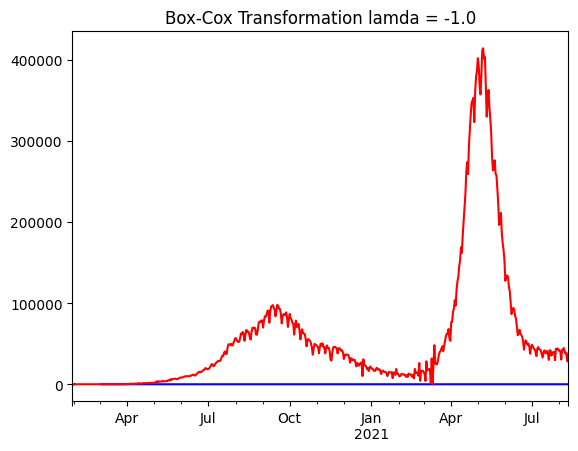

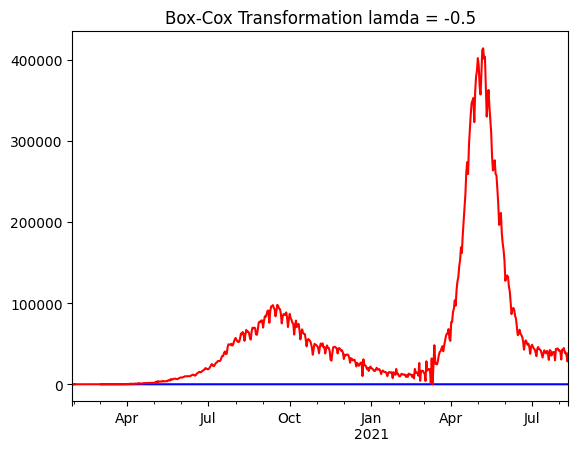

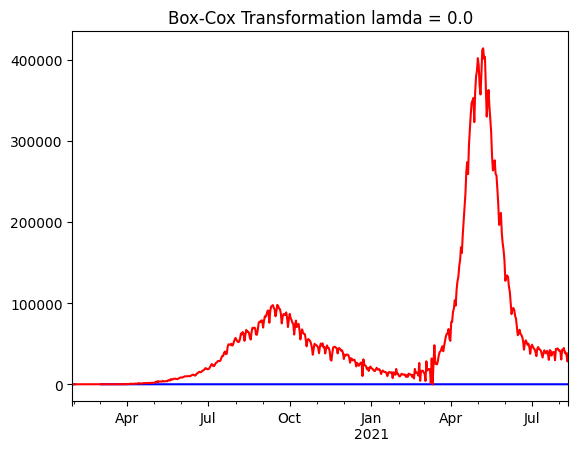

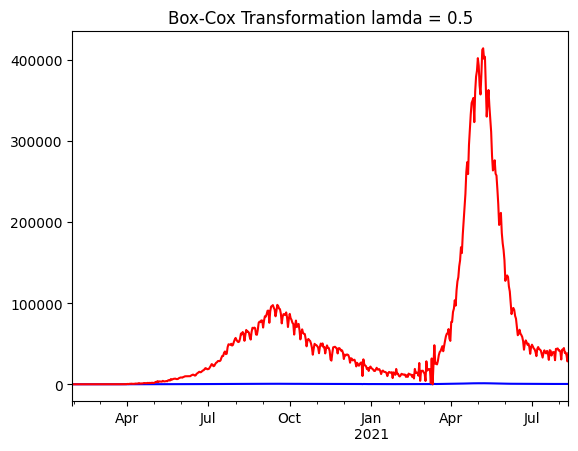

In [130]:
from scipy.stats import boxcox
for i in np.arange(-1,1,0.5):
    boxcox(tsd['Confirmed'], lmbda=i).plot(color='Blue')
    tsd['Confirmed'].plot(color='Red')
    plt.title(str("Box-Cox Transformation lamda = "+ str(i)))
    plt.show()

In [131]:
print('for normal data Results of Dickey-Fuller Test:')
dftest = adfuller(tsd['Confirmed'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for normal data Results of Dickey-Fuller Test:
Test Statistic                  -3.152131
p-value                          0.022928
#Lags Used                      16.000000
Number of Observations Used    543.000000
Critical Value (1%)             -3.442450
Critical Value (5%)             -2.866877
Critical Value (10%)            -2.569613
dtype: float64


## Moving Average Smoothing

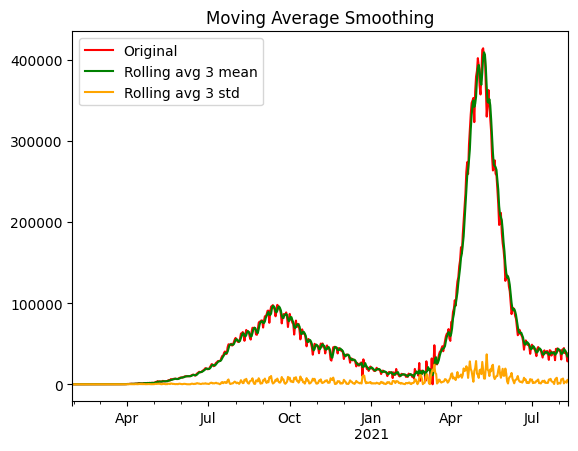

In [132]:
tsd['Confirmed'].plot(color='Red', label="Original")
tsd['Confirmed'].rolling(window=3).mean().plot(color='Green', label="Rolling avg 3 mean")
tsd['Confirmed'].rolling(window=3).std().plot(color='Orange', label="Rolling avg 3 std")
plt.title("Moving Average Smoothing")
plt.legend()

c:\Users\dharaneish\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


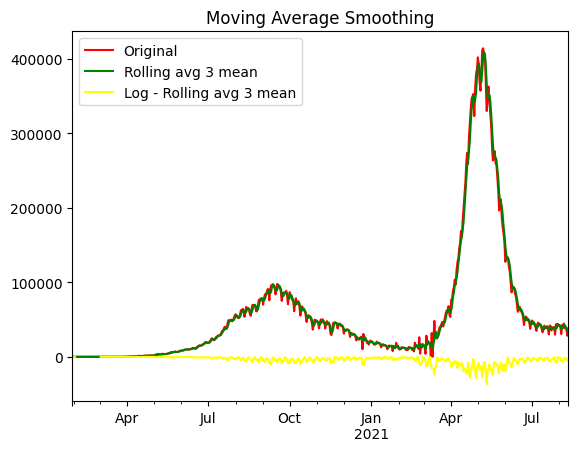

In [133]:
tsd['Confirmed'].plot(color='Red', label="Original")
tsd['Confirmed'].rolling(window=3).mean().plot(color='Green', label="Rolling avg 3 mean")
(np.log(tsd['Confirmed']) - tsd['Confirmed'].rolling(window=3).std()).plot(color='Yellow', label="Log - Rolling avg 3 mean")
plt.title("Moving Average Smoothing")
plt.legend()

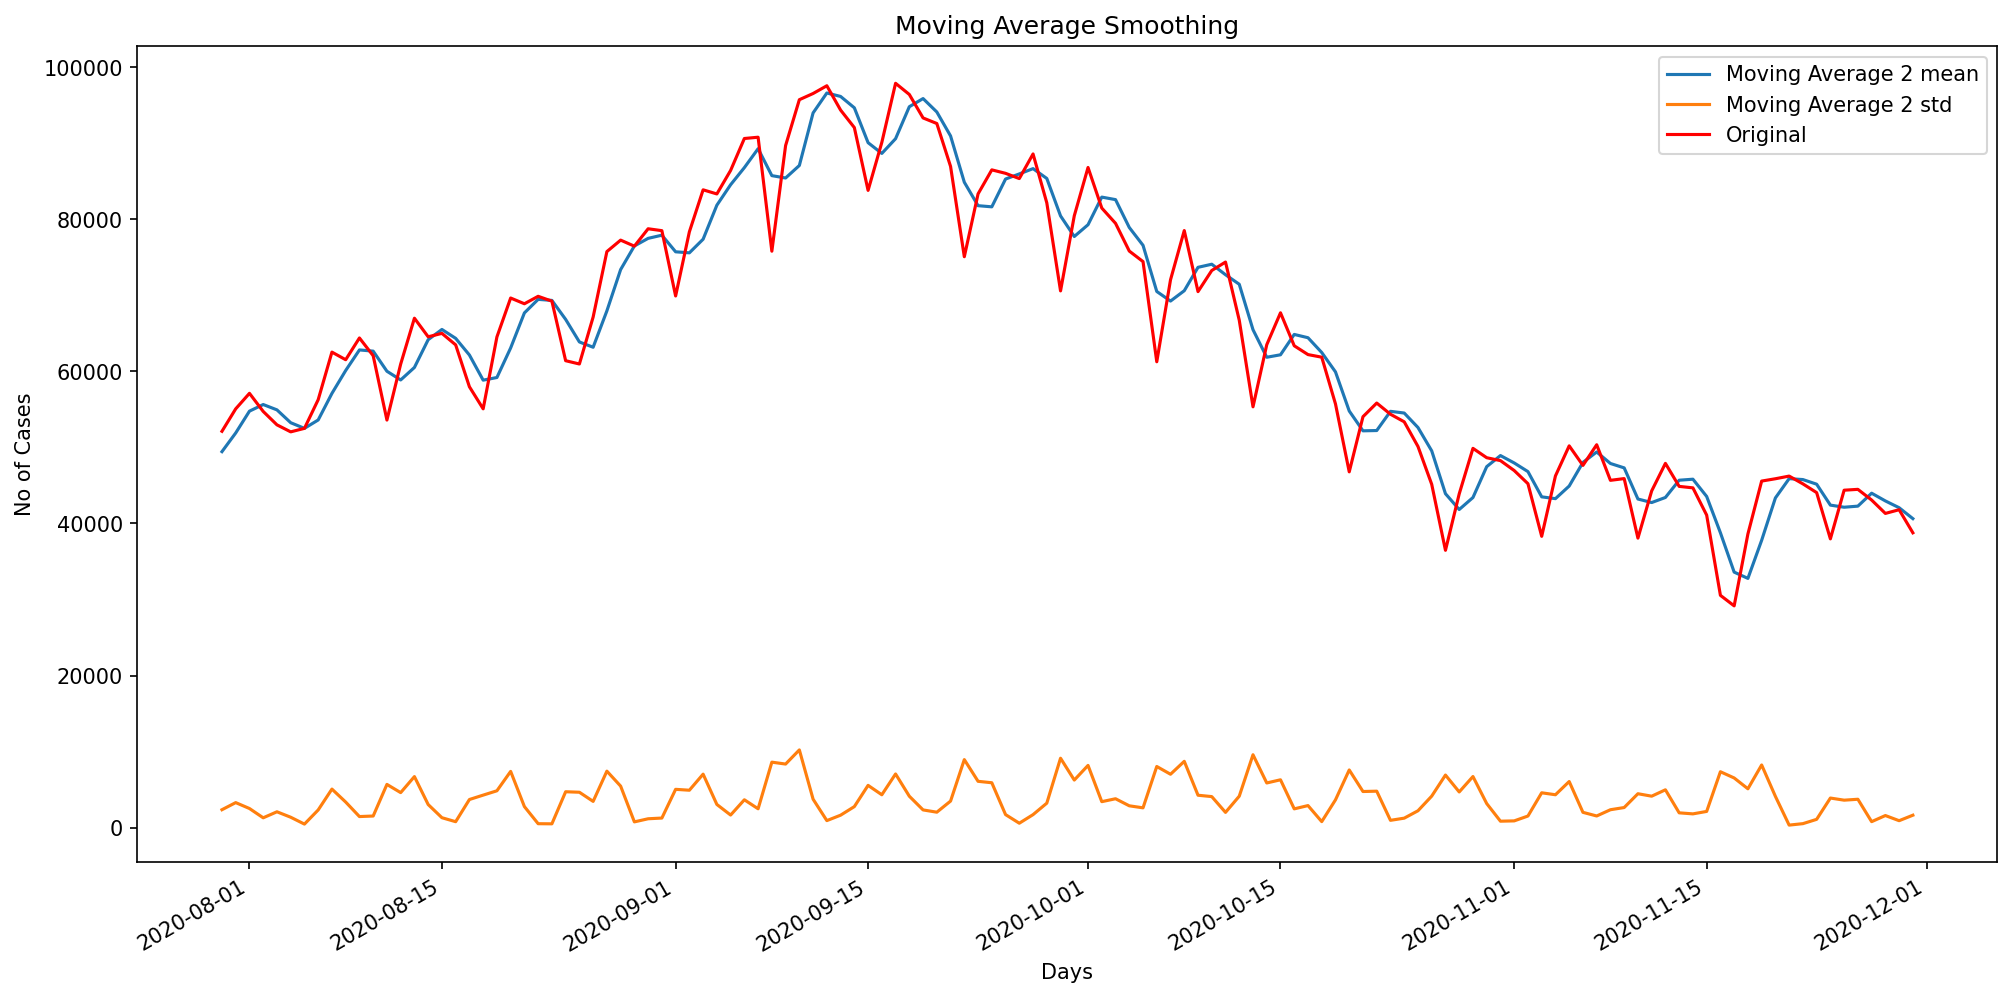

In [134]:
plt.figure(figsize=(16, 8), dpi=150) 
x = pd.date_range(start='30/Jul/2020', end='30/Nov/2020', freq='D')

y = tsd['Confirmed'].rolling(window=3).mean()['30/Jul/2020':'30/Nov/2020']
plt.plot(x, y, label="Moving Average 2 mean")
y = tsd['Confirmed'].rolling(window=3).std()['30/Jul/2020':'30/Nov/2020']
plt.plot(x, y, label="Moving Average 2 std")
tsd['Confirmed']['30/Jul/2020':'30/Nov/2020'].plot(color='Red', label="Original")

plt.title("Moving Average Smoothing")
plt.xlabel('Days') 
plt.ylabel('No of Cases')
plt.legend()


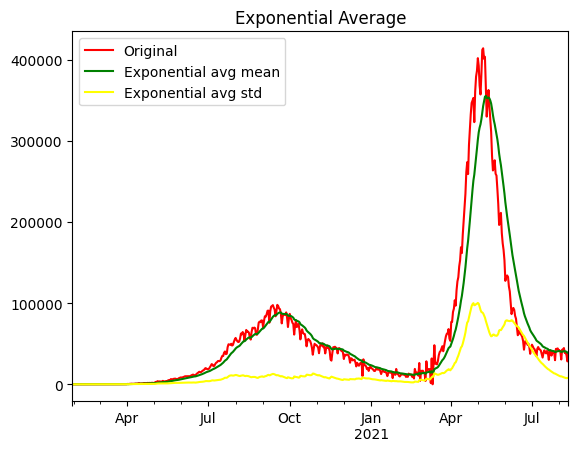

In [135]:
tsd['Confirmed'].plot(color='Red', label="Original")
tsd['Confirmed'].ewm(alpha=0.1).mean().plot(color='Green', label="Exponential avg mean")
tsd['Confirmed'].ewm(alpha=0.1).std().plot(color='Yellow', label="Exponential avg std")
plt.title("Exponential Average")
plt.legend()

c:\Users\dharaneish\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


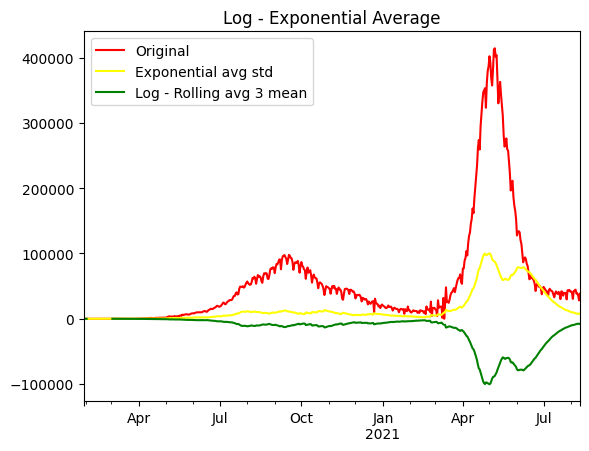

In [136]:
tsd['Confirmed'].plot(color='Red', label="Original")
tsd['Confirmed'].ewm(alpha=0.1).std().plot(color='Yellow', label="Exponential avg std")
(np.log(tsd['Confirmed']) - tsd['Confirmed'].ewm(alpha=0.1).std()).plot(color='Green', label="Log - Rolling avg 3 mean")
plt.title("Log - Exponential Average")
plt.legend()

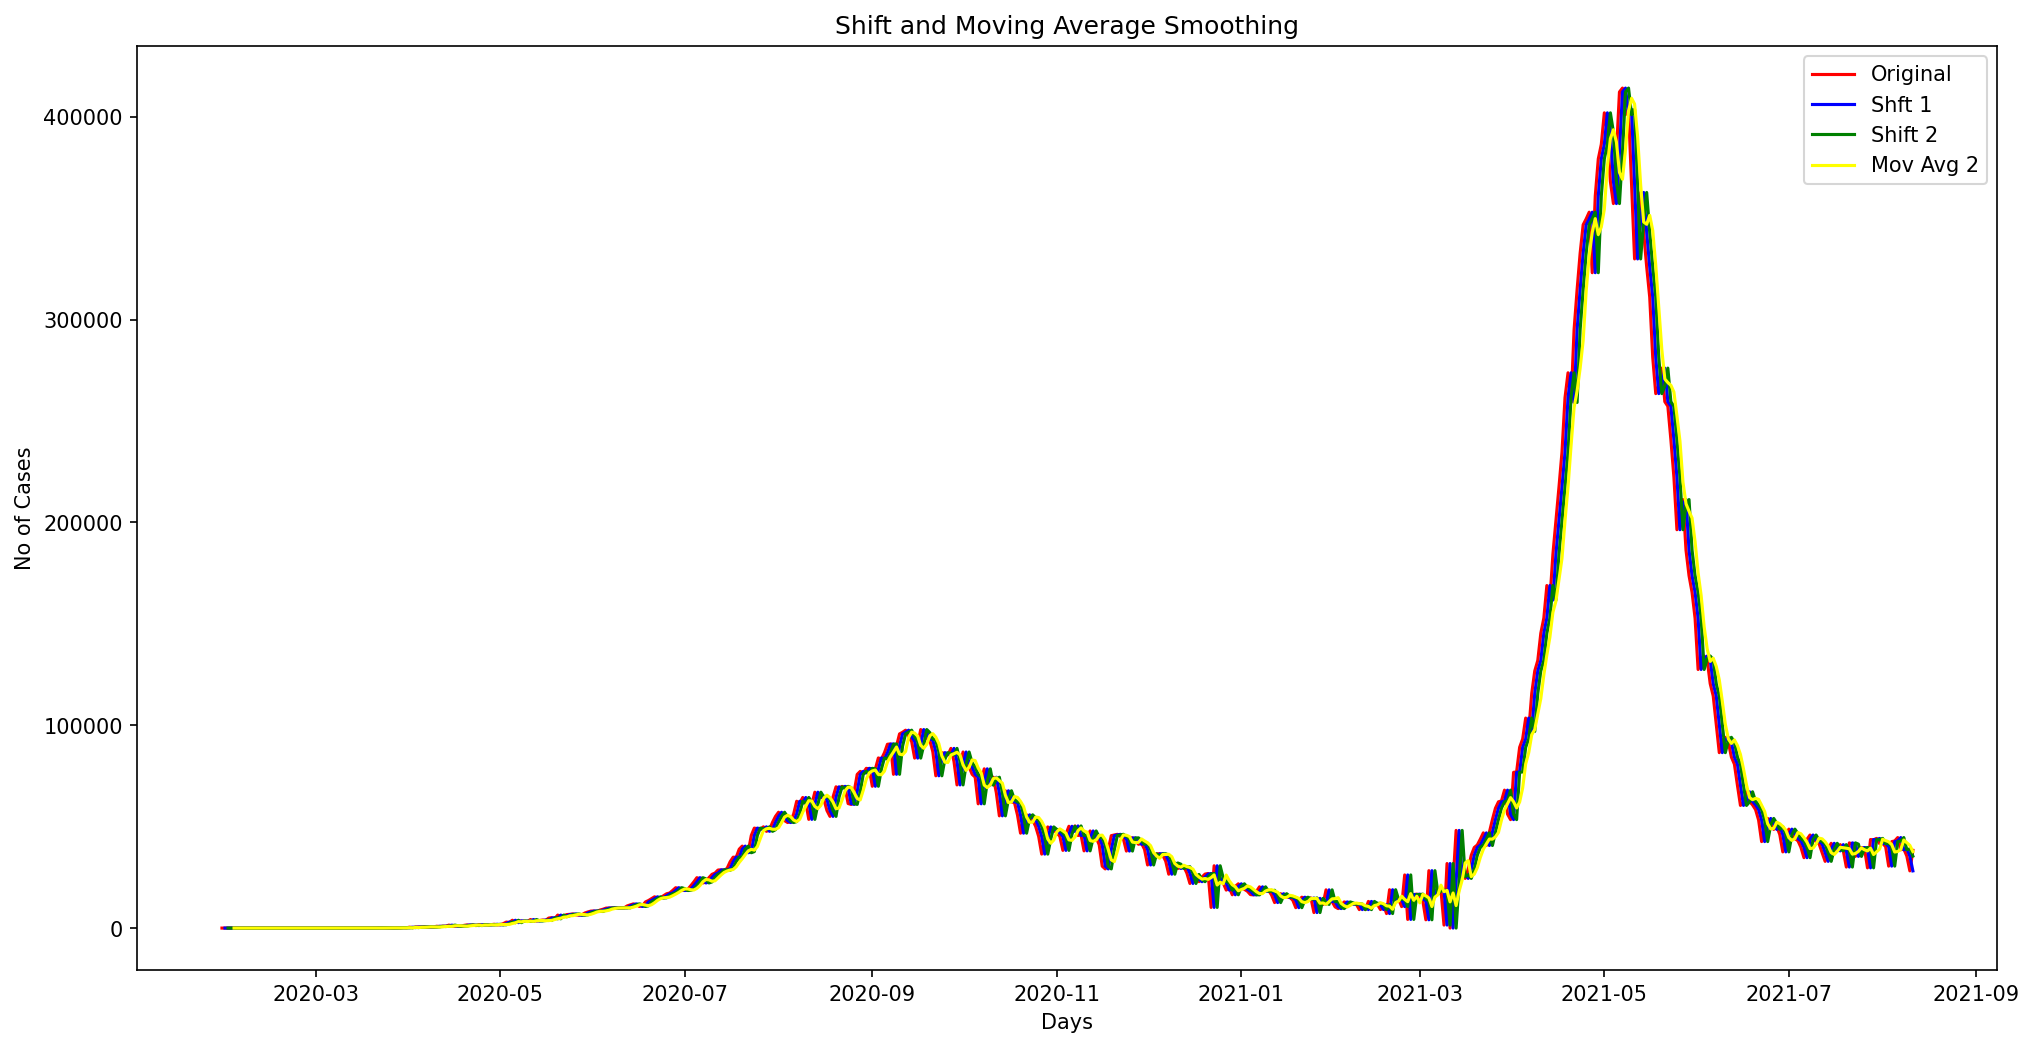

In [137]:
plt.figure(figsize=(16, 8), dpi=150) 

width = 3
plt.plot(tsd['Confirmed'], color='Red', label="Original")
plt.plot(tsd['Confirmed'].shift(1), color='Blue', label="Shft 1")
plt.plot(tsd['Confirmed'].shift(width - 1), color='Green', label="Shift 2")

plt.plot(tsd['Confirmed'].shift(width - 1).rolling(window=width).mean(), color='Yellow', label="Mov Avg 2")
plt.title("Shift and Moving Average Smoothing")
plt.xlabel('Days') 
plt.ylabel('No of Cases')
plt.legend()

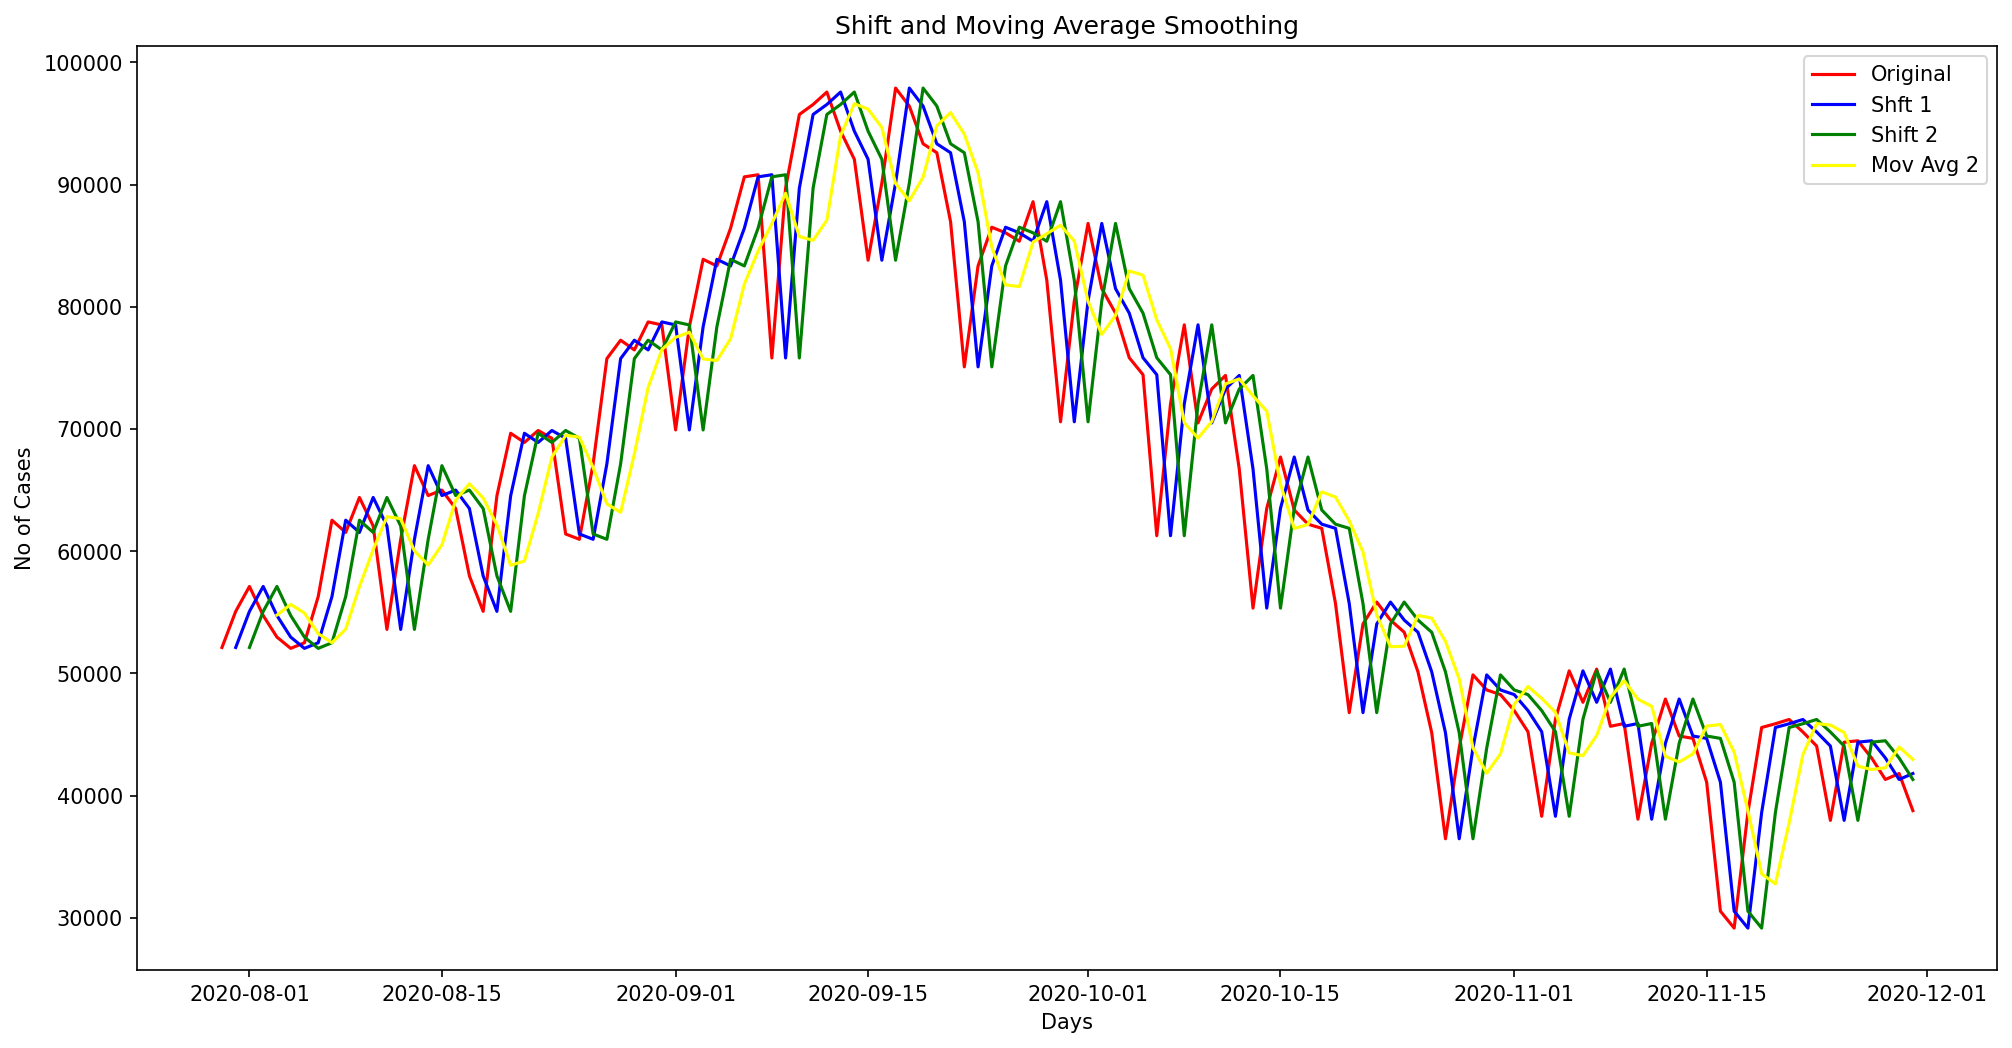

In [138]:
plt.figure(figsize=(16, 8), dpi=150) 

width = 3
plt.plot(tsd['Confirmed']['30/Jul/2020':'30/Nov/2020'], color='Red', label="Original")
plt.plot(tsd['Confirmed']['30/Jul/2020':'30/Nov/2020'].shift(1), color='Blue', label="Shft 1")
plt.plot(tsd['Confirmed']['30/Jul/2020':'30/Nov/2020'].shift(width - 1), color='Green', label="Shift 2")

plt.plot(tsd['Confirmed']['30/Jul/2020':'30/Nov/2020'].shift(width - 1).rolling(window=width).mean(), color='Yellow', label="Mov Avg 2")
plt.title("Shift and Moving Average Smoothing")
plt.xlabel('Days') 
plt.ylabel('No of Cases')
plt.legend()

predicted=0.666667, expected=1.000000
predicted=0.666667, expected=0.000000
predicted=0.666667, expected=0.000000
predicted=0.333333, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.

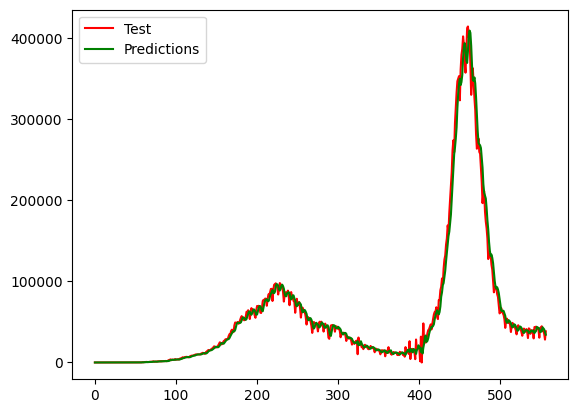

In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
X = tsd['Confirmed']
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
print('Test MAE: %.3f' % np.sqrt(mean_absolute_error(test, predictions)))
print('Test MSE: %.3f' % (mean_squared_error(test, predictions)))
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, predictions)))

plt.plot(test, color='Red', label="Test")
plt.plot(predictions, color='Green', label="Predictions")
plt.legend()

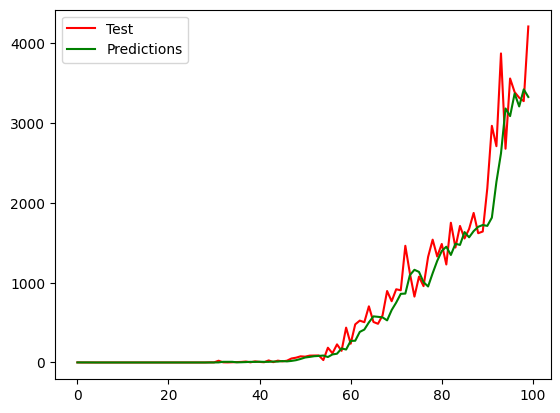

In [140]:
# zoom plot
plt.plot(test[:100],color='Red', label="Test")
plt.plot(predictions[:100], color='Green', label="Predictions")
plt.legend()